In [ ]:
# EDA_analisis_temporal 

import pandas as pd

# 1. RUTAS REALES
ruta_ventas = r"D:\Usuario\Escritorio\HENRY 2025\PF\repositorio PF-facosta73\PI-Final-Henry-G2\data\SalesFINAL12312016_clean.csv"
ruta_compras = r"D:\Usuario\Escritorio\HENRY 2025\PF\repositorio PF-facosta73\PI-Final-Henry-G2\data\InvoicePurchases_clean.csv"

df_sales = pd.read_csv(ruta_ventas)
df_purchases = pd.read_csv(ruta_compras)

print("✅ Archivos cargados. Procesando fechas...")

# 2. Convertimos las columnas de texto a formato Fecha Real (DateTime)
df_sales['SalesDate'] = pd.to_datetime(df_sales['SalesDate'])
df_purchases['InvoiceDate'] = pd.to_datetime(df_purchases['InvoiceDate'])

# 3. Descubrimos la ventana de tiempo exacta
print("\n--- 📅 LÍNEA DE TIEMPO REAL ---")
print(f"💰 VENTAS registradas:  Desde {df_sales['SalesDate'].min().date()} hasta {df_sales['SalesDate'].max().date()}")
print(f"🛒 COMPRAS registradas: Desde {df_purchases['InvoiceDate'].min().date()} hasta {df_purchases['InvoiceDate'].max().date()}")

# 4. Vemos cómo se distribuyen las ventas mes a mes
print("\n--- 📊 DISTRIBUCIÓN DE VENTAS MES A MES ---")
ventas_mensuales = df_sales.groupby(df_sales['SalesDate'].dt.to_period('M'))['SalesDollars'].sum()

for mes, total in ventas_mensuales.items():
    print(f"Mes {mes}: ${total/1e6:,.2f} Millones")

✅ Archivos cargados. Procesando fechas...

--- 📅 LÍNEA DE TIEMPO REAL ---
💰 VENTAS registradas:  Desde 2016-01-01 hasta 2016-02-29
🛒 COMPRAS registradas: Desde 2016-01-04 hasta 2017-01-10

--- 📊 DISTRIBUCIÓN DE VENTAS MES A MES ---
Mes 2016-01: $29.85 Millones
Mes 2016-02: $3.29 Millones


In [ ]:
# 1. Filtramos las compras para que coincidan EXACTAMENTE con los meses de ventas (Ene-Feb 2016)
compras_ene_feb = df_purchases[(df_purchases['InvoiceDate'] >= '2016-01-01') & 
                               (df_purchases['InvoiceDate'] <= '2016-02-29')]

# Buscamos la columna de plata 
col_plata = 'Dollars' if 'Dollars' in df_purchases.columns else 'Total'

total_comprado_ene_feb = compras_ene_feb[col_plata].sum()
total_vendido_ene_feb = df_sales['SalesDollars'].sum()

print("🍏 COMPARATIVA REAL: MANZANAS CON MANZANAS (Enero - Febrero 2016) 🍏")
print("-" * 60)
print(f"🛒 Plata gastada en Compras (Ene-Feb): ${total_comprado_ene_feb/1e6:,.2f} Millones")
print(f"💰 Plata ingresada por Ventas (Ene-Feb):  ${total_vendido_ene_feb/1e6:,.2f} Millones")

diferencia = total_comprado_ene_feb - total_vendido_ene_feb
if diferencia > 0:
    print(f"\n🚨 ALERTA: Solo en los primeros 2 meses, compraron ${diferencia/1e6:,.2f} Millones MÁS de lo que vendieron.")
else:
    print(f"\n✅ Bien: En estos 2 meses vendieron más de lo que compraron.")

🍏 COMPARATIVA REAL: MANZANAS CON MANZANAS (Enero - Febrero 2016) 🍏
------------------------------------------------------------
🛒 Plata gastada en Compras (Ene-Feb): $34.52 Millones
💰 Plata ingresada por Ventas (Ene-Feb):  $33.14 Millones

🚨 ALERTA: Solo en los primeros 2 meses, compraron $1.38 Millones MÁS de lo que vendieron.


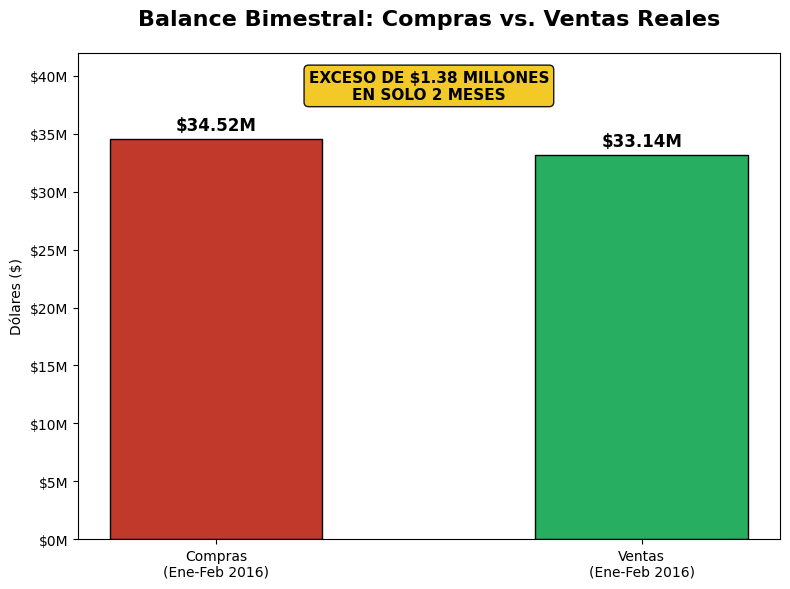

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Compras vs Ventas (Ene-Feb 2016) ---
plt.style.use('default')
fig, ax = plt.subplots(figsize=(8, 6), facecolor='white')

categorias = ['Compras\n(Ene-Feb 2016)', 'Ventas\n(Ene-Feb 2016)']
valores = [34520000, 33140000] # Los datos reales 
colores = ['#c0392b', '#27ae60'] 

bars = ax.bar(categorias, valores, color=colores, width=0.5, edgecolor='black')

ax.set_title('Balance Bimestral: Compras vs. Ventas Reales', fontsize=16, pad=20, fontweight='bold')
ax.set_ylabel('Dólares ($)')

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 500000, f'${yval/1e6:.2f}M', 
            ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

formatter = FuncFormatter(lambda x, p: f'${x/1e6:.0f}M')
ax.yaxis.set_major_formatter(formatter)

# Anotación del exceso
ax.annotate('EXCESO DE $1.38 MILLONES\nEN SOLO 2 MESES', xy=(0.5, 30000000), xytext=(0.5, 38000000),
             fontsize=11, color='black', fontweight='bold', ha='center',
             bbox=dict(boxstyle="round,pad=0.3", fc="#f1c40f", ec="black", alpha=0.9))

ax.set_ylim(0, 42000000)
plt.tight_layout()
plt.savefig('compras_vs_ventas_enefeb.png', bbox_inches='tight', facecolor='white', dpi=300)
plt.show()

In [6]:
import pandas as pd

# 1. Cargamos el archivo de Inventario
ruta_endinv = r"D:\Usuario\Escritorio\HENRY 2025\PF\repositorio PF-facosta73\PI-Final-Henry-G2\data\EndInvFINAL12312016_clean.csv"
df_endinv = pd.read_csv(ruta_endinv)

print("✅ Archivo de Inventario cargado.")

# 2. Recreamos nuestra columna mágica: Cantidad de botellas x Precio unitario
df_endinv['CapitalInmovilizado'] = df_endinv['onHand'] * df_endinv['Price']

# 3. Filtramos el inventario SOLO para nuestro "agujero negro" (Sucursal 50)
inventario_50 = df_endinv[df_endinv['Store'] == 50]

# 4. Sacamos a los Culpables: Top 5 productos con más plata inmovilizada
top_productos_50 = inventario_50.groupby('Description')['CapitalInmovilizado'].sum().sort_values(ascending=False).head(5)

print("\n📦 LOS CULPABLES: TOP 5 PRODUCTOS ESTANCADOS EN LA SUCURSAL 50 📦")
print("-" * 60)
for producto, plata in top_productos_50.items():
    print(f"🍷 {producto}: ${plata:,.2f} parados")

✅ Archivo de Inventario cargado.

📦 LOS CULPABLES: TOP 5 PRODUCTOS ESTANCADOS EN LA SUCURSAL 50 📦
------------------------------------------------------------
🍷 Jack Daniels No 7 Black: $56,366.42 parados
🍷 Jameson Irish Whiskey: $54,587.11 parados
🍷 Tito's Handmade Vodka: $43,233.78 parados
🍷 Ketel One Vodka: $42,971.99 parados
🍷 Grey Goose Vodka: $40,527.06 parados


In [7]:
# 1. Calculamos las ventas reales (Ene-Feb) por sucursal
ventas_por_sucursal = df_sales.groupby('Store')['SalesDollars'].sum().sort_values(ascending=False)

# 2. Calculamos el stock final (Dic 31) por sucursal
# (Aseguramos que exista la columna de plata inmovilizada)
if 'CapitalInmovilizado' not in df_endinv.columns:
    df_endinv['CapitalInmovilizado'] = df_endinv['onHand'] * df_endinv['Price']
stock_por_sucursal = df_endinv.groupby('Store')['CapitalInmovilizado'].sum().sort_values(ascending=False)

# 3. Armamos un ranking para comparar
print("🏆 RANKING: STOCK vs VENTAS 🏆")
print("-" * 50)
print(f"La Sucursal 50 está en el PUESTO #{stock_por_sucursal.index.get_loc(50) + 1} de mayor STOCK inmovilizado.")
print(f"La Sucursal 50 está en el PUESTO #{ventas_por_sucursal.index.get_loc(50) + 1} de mayores VENTAS reales (Ene-Feb).")
print("-" * 50)

# Mostramos el Top 3 de ventas para ver quiénes son las verdaderas estrellas
print("\n🌟 LAS VERDADERAS ESTRELLAS EN VENTAS (Ene-Feb) 🌟")
print(ventas_por_sucursal.head(3).apply(lambda x: f"${x/1e6:.2f}M"))

🏆 RANKING: STOCK vs VENTAS 🏆
--------------------------------------------------
La Sucursal 50 está en el PUESTO #1 de mayor STOCK inmovilizado.
La Sucursal 50 está en el PUESTO #11 de mayores VENTAS reales (Ene-Feb).
--------------------------------------------------

🌟 LAS VERDADERAS ESTRELLAS EN VENTAS (Ene-Feb) 🌟
Store
34    $1.54M
15    $1.42M
76    $1.40M
Name: SalesDollars, dtype: object


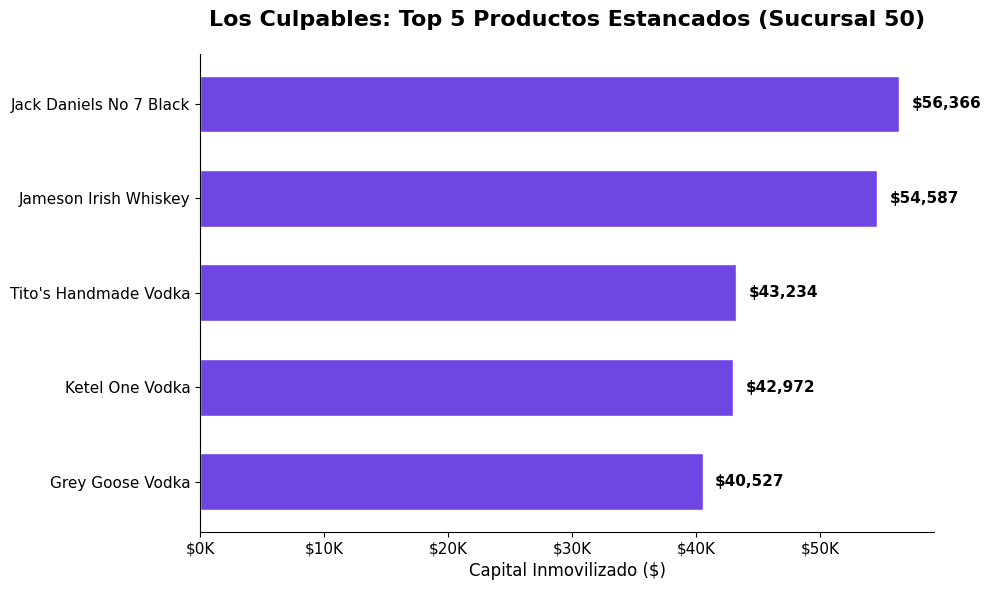

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

# Los datos reales
productos = ['Grey Goose Vodka', 'Ketel One Vodka', "Tito's Handmade Vodka", 'Jameson Irish Whiskey', 'Jack Daniels No 7 Black']
plata = [40527.06, 42971.99, 43233.78, 54587.11, 56366.42]

# Usamos morado (#6f46e4)
bars = ax.barh(productos, plata, color='#6f46e4', edgecolor='white', height=0.6)

ax.set_title('Los Culpables: Top 5 Productos Estancados (Sucursal 50)', fontsize=16, pad=20, fontweight='bold')
ax.set_xlabel('Capital Inmovilizado ($)', fontsize=12)

# Formatear el eje X a miles (K)
formatter = FuncFormatter(lambda x, p: f'${x/1000:.0f}K')
ax.xaxis.set_major_formatter(formatter)

# Poner los números al final de cada barra
for bar in bars:
    xval = bar.get_width()
    ax.text(xval + 1000, bar.get_y() + bar.get_height()/2, f'${xval:,.0f}', 
            ha='left', va='center', fontsize=11, fontweight='bold', color='black')

# Limpieza visual
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.savefig('top5_productos_sucursal50.png', bbox_inches='tight', facecolor='white', dpi=300)
plt.show()